# Code for the paper Saldaña, Camacho, Villavicencio, Velasco

Model dynamics, equilibrium points and basic reproduction number.

First, some notation to reduce the code size.

State variables
---
$x01 = S_f\\
x02 = S_m\\
x03 = V_f\\
x04 = V_m\\
x05 = A_f\\
x06 = A_m\\
x07 = I_f\\
x08 = I_m\\
x09 = P_f\\
x10 = P_m\\
x11 = C_f\\
x12 = C_m$

Parameters
---
$p01 = \Lambda_f\\
p02 = \Lambda_m\\
p03 = \mu_f\\
p04 = \mu_m\\
p05 = q_A^f\\
p06 = q_A^m\\
p07 = k_A^f\\
p08 = k_A^m\\
p09 = q_I^f\\
p10 = q_I^m\\
p11 = k_I^f\\
p12 = k_I^m\\
p13 = q_P^f\\
p14 = q_P^m\\
p15 = k_P^f\\
p16 = k_P^m\\
p17 = \theta_f\\
p18 = \theta_m\\
p19 = \delta_f\\
p20 = \delta_m\\
p21 = \beta_A^f\\
p22 = \beta_A^m\\
p23 = \beta_I^f\\
p24 = \beta_I^m$

aux funs
---
$f01 = \lambda_f = (\beta_A^f*A_f + \beta_I^f*I_f)/N_f,\\
f02 = \lambda_m = (\beta_A^m*A_m + \beta_I^m*I_m)/N_m$

Control variables
---
$u1 = w_f\\
u2 = w_m\\
u3 = u_f\\
u4 = u_m$

Let us now define the model equations

In [1]:
import numpy as np
from scipy.integrate import odeint, ode
from matplotlib import pyplot as plt

# Model
def model(State, t, Control):
    # State variables
    x01 = State[0]
    x02 = State[1]
    x03 = State[2]
    x04 = State[3]
    x05 = State[4]
    x06 = State[5]
    x07 = State[6]
    x08 = State[7]
    x09 = State[8]
    x10 = State[9]
    x11 = State[10]
    x12 = State[11]
    
    # Control variables
    u1 = Control[0]
    u2 = Control[1]
    u3 = Control[2]
    u4 = Control[3]
    
    # Auxiliar
    Nf = x01 + x03 + x05 + x07 + x09 + x11
    Nm = x02 + x04 + x06 + x08 + x10 + x12
    f01 = p21*x05/Nf + p23*x07/Nf
    f02 = p22*x06/Nm + p24*x08/Nm
    
    # ODEs
    ode1 = (1-u1)*p01 - (f02+u3+p03)*x01 + p05*p07*x05 + p09*p11*x07 + p13*p15*x09 + p17*x03

    ode2 = (1-u2)*p02 - (f01+u4+p04)*x02 + p06*p08*x06 + p10*p12*x08 + p14*p16*x10 + p18*x04

    ode3 = u1*p01 + u3*x01 - (p03+p17)*x03

    ode4 = u2*p02 + u4*x02 - (p04+p18)*x04

    ode5 = f02*x01 - (p07+p03)*x05

    ode6 = f01*x02 - (p08+p04)*x06

    ode7 = (1-p05)*p07*x05 - (p11+p03)*x07

    ode8 = (1-p06)*p08*x06 - (p12+p04)*x08

    ode9 = (1-p09)*p11*x07 - (p15+p03)*x09

    ode10 = (1-p10)*p12*x08 - (p16+p04)*x10

    ode11 = (1-p13)*p15*x09 - (p19+p03)*x11

    ode12 = (1-p14)*p16*x10 - (p20+p04)*x12
    
    odes = np.array([ode1, ode2, ode3,
                     ode4, ode5, ode6,
                     ode7, ode8, ode9,
                     ode10, ode11, ode12])
    return odes

Now we will fix the initial conditions.

In [16]:
# ODE parameters
Nf0 = 3352419
Nm0 = 3094541
# Total: 6 * 10^6

p01 = 17097 # Lambda_f
p02 = 15782 # Lambda_m
p03 = 1/50 # mu_f
p04 = 1/50 # mu_m
p05 = 0.7 # q_A^f
p06 = 0.7 # q_A^m
p07 = 1 # k_A^f
p08 = 1 # k_A^m
p09 = 0.9 # q_I^f
p10 = 0.9 # q_I^m
p11 = 1/0.81 # k_I^f
p12 = 1/0.62 # k_I^m
p13 = 0.4 # q_P^f
p14 = 0.9 # q_P^m
p15 = 1/15 # k_P^f
p16 = 1/15 # k_P^m
p17 = 1/20 # theta_f
p18 = 1/20 # theta_m
p19 = 0.001 # delta_f
p20 = 0.0005 # delta_m
p21 = 2.0 # beta_A^f
p22 = 2.0 # beta_A^m
p23 = 4.0 # beta_I^f
p24 = 4.0 # beta_I^m

# Temporal parameters
T  = 100.                  # Final Time
NN = int(10*T)            # sub-intervals numbers
t  = np.linspace(0, T, NN) # Interval [0,T] with N points

# Initial condition sets
Vf0 = 0.2*Nf0
Vm0 = 0
If0 = 0.01*Nf0
Im0 = 0.01*Nm0
Af0 = 0.05*Nf0
Am0 = 0.05*Nm0
Pf0 = 0.001*Nf0
Pm0 = 0.001*Nm0
Cf0 = 0.001*Nf0
Cm0 = 0.001*Nm0
Sf0 = Nf0-Vf0-Af0-If0-Pf0-Cf0
Sm0 = Nm0-Vm0-Am0-Im0-Pm0-Cm0

State0 = np.array([Sf0, Sm0, Vf0, Vm0, 
                   Af0, Am0, If0, Im0, 
                   Pf0, Pm0, Cf0, Cm0])

u1, u2, u3, u4 = 0., 0., 0., 0.
Control0 = np.array([u1, u2, u3, u4])

Finally we will solve model using odeint and plot the solution.

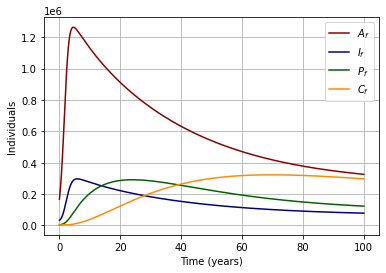

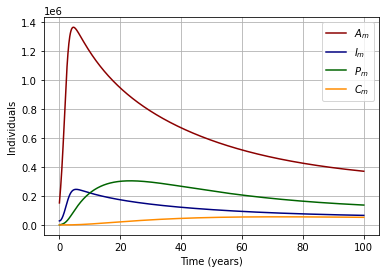

In [21]:
#solution
sol = odeint(model, State0, t, args=(Control0,))

#plot females
plt.figure()
plt.plot(t, sol[:, 4], 'darkred', label='$A_{f}$')
plt.plot(t, sol[:, 6], 'navy', label='$I_{f}$')
plt.plot(t, sol[:, 8], 'darkgreen', label='$P_{f}$')
plt.plot(t, sol[:, 10], 'darkorange', label='$C_{f}$')
plt.legend(loc='best')
plt.xlabel('Time (years)')
plt.ylabel('Individuals')
plt.grid()
plt.show()

#plot males
plt.figure()
plt.plot(t, sol[:, 5], 'darkred', label='$A_{m}$')
plt.plot(t, sol[:, 7], 'navy', label='$I_{m}$')
plt.plot(t, sol[:, 9], 'darkgreen', label='$P_{m}$')
plt.plot(t, sol[:, 11], 'darkorange', label='$C_{m}$')
plt.legend(loc='best')
plt.xlabel('Time (years)')
plt.ylabel('Individuals')
plt.grid()
plt.show()

Disease-free equilibria:
$
\begin{eqnarray}
S^*_{{f}}={\frac {\Lambda_{{f}} \left(  \left( 1-w_{{f}} \right) \mu_{{f
}}+\theta_{{f}} \right) }{\mu_{{f}} \left( u_{{f}}+\mu_{{f}}+\theta_{{
f}} \right) }},\quad
S^*_{{m}}={\frac {\Lambda_{{m}} \left(  \left( 1-w_{{m}} \right) \mu_{{m
}}+\theta_{{m}} \right) }{\mu_{{m}} \left( u_{{m}}+\mu_{{m}}+\theta_{{
m}} \right) }}\\
V^*_{{f}}={\frac {\Lambda_{{f}} \left( u_{{f}}+\mu_{{f}}w_{{f}} \right) 
}{\mu_{{f}} \left( u_{{f}}+\mu_{{f}}+\theta_{{f}} \right) }},\quad
V^*_{{m}}={\frac {\Lambda_{{m}} \left( u_{{m}}+\mu_{{m}}w_{{m}} \right) 
}{\mu_{{m}} \left( u_{{m}}+\mu_{{m}}+\theta_{{m}} \right) }}
\end{eqnarray}
$

In [22]:
#DFE 
# susceptibles
SfDFE = (p01*((1-u1)*p03 + p17))/(p03*(u3 + p03 + p17))
SmDFE = (p02*((1-u2)*p04 + p18))/(p04*(u4 + p04 + p18))

# vaccinated
VfDFE = (p01*(u3 + p03*u1))/(p03*(u3 + p03 + p17))
VmDFE = (p02*(u4 + p04*u2))/(p04*(u4 + p04 + p18))

# total population
NfDFE = SfDFE + VfDFE
NmDFE = SmDFE + VmDFE

The basic reproduction number is $R_0 = \sqrt{R_1*R_2}$ where
\begin{eqnarray}
R_1 = \left(\dfrac{\beta_{A}^{m}}{k_{A}^{m}+\mu_{m}} + \dfrac{(1-q_{A}^{m})k_{A}^{m}\beta_{I}^{m}}{(k_{A}^{m}+\mu_{m})(k_{I}^{m}+\mu_{m})}\right)\dfrac{S_{f}^{*}}{N_{m}^{*}},\\
R_2 = \left(\dfrac{\beta_{A}^{f}}{k_{A}^{f}+\mu_{f}} + \dfrac{(1-q_{A}^{f})k_{A}^{f}\beta_{I}^{f}}{(k_{A}^{f}+\mu_{f})(k_{I}^{f}+\mu_{f})}\right)\dfrac{S_{m}^{*}}{N_{f}^{*}},\\
\end{eqnarray}

In [23]:
# R0
# Let us define
R1 = (p22/(p08 + p04) + (1-p06)*p08*p24/((p08 + p04)*(p12 + p04)) )*(SfDFE/NmDFE)

R2 = (p21/(p07 + p03) + (1-p05)*p07*p23/((p07 + p03)*(p11 + p03)) )*(SmDFE/NfDFE)

#then R0 is
R0 = np.sqrt(R1*R2)
print("The basic reproduction number is", R0)

The basic reproduction number is 2.7877821596463064
